In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

In [5]:
from google.colab import files
uploaded = files.upload()

Saving HH_Input.xlsx to HH_Input.xlsx


In [2]:
df = pd.read_excel("HH_Input.xlsx")
df = df.drop('Unnamed: 0', axis = 1)
df

,Target,n-1,n-2,n-3,n-4,n-5,dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%)
0,12.60,12.80,11.90,13.50,12.30,12.80,0,0,1,1,6.1,2.0,84.33
1,11.90,12.60,12.80,11.90,13.50,12.30,0,0,1,1,6.0,1.6,80.44
2,13.00,11.90,12.60,12.80,11.90,13.50,0,0,1,1,6.0,1.6,80.44
3,11.91,13.00,11.90,12.60,12.80,11.90,0,0,1,1,5.8,1.7,82.54
4,11.90,11.91,13.00,11.90,12.60,12.80,0,0,1,1,5.8,1.7,82.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,13.56,15.12,15.00,14.56,15.00,15.31,1,0,0,12,6.5,3.3,88.23
35031,13.81,13.56,15.12,15.00,14.56,15.00,1,0,0,12,6.6,4.4,87.69
35032,14.12,13.81,13.56,15.12,15.00,14.56,1,0,0,12,6.6,4.4,87.69
35033,14.50,14.12,13.81,13.56,15.12,15.00,1,0,0,12,6.7,4.1,88.13


In [3]:
feature_cols = ['n-1', 'n-2', 'n-3', 'n-4', 'n-5', 'dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']

X = df[feature_cols] # Features
y = df.Target # Target variable

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) #split training:testing 75:25

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)

In [9]:
SVM = HalvingGridSearchCV(svm.SVR(gamma='scale'), {
    'C': [0.01, 0.1, 1, 100],
    'kernel': ['rbf','linear'],
    'epsilon': [0.01,0.1,1,10]
}, cv=3, verbose=2, return_train_score=False)
SVM.fit(X_scaled, y)

svm_results = pd.DataFrame(SVM.cv_results_)
svmresults = svm_results[['param_kernel','param_C','param_epsilon', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
svmresults

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1297
max_resources_: 35035
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 1297
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.1s
[CV] EN

,param_kernel,param_C,param_epsilon,mean_test_score,rank_test_score
41,linear,1,1,0.966872,1
42,linear,100,1,0.966845,2
39,linear,100,0.1,0.966720,3
38,linear,1,0.1,0.966691,4
40,linear,100,0.01,0.966658,5
37,linear,1,0.01,0.966652,6
35,linear,0.1,0.1,0.966209,7
34,linear,0.1,1,0.966158,8
36,linear,0.1,0.01,0.966140,9
47,linear,100,1,0.963823,10


# Linear Regression


In [20]:
from sklearn.linear_model import Lasso

alpha = range(0,2,1)

LR = GridSearchCV(Lasso(), {
    'alpha': alpha,
}, cv=10, return_train_score=False)
LR.fit(X_scaled, y)

LR_results = pd.DataFrame(LR.cv_results_)
LR_results = LR_results[['params', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
LR_results

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16810.097947232618, tolerance: 94.432955791459
  model = cd_fast.enet_coordinate_descent(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
 

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19138.339015388174, tolerance: 108.74186115279389
  model = cd_fast.enet_coordinate_descent(


,params,mean_test_score,rank_test_score
0,{'alpha': 0},0.960060,1
1,{'alpha': 1},0.918373,2


In [4]:
from sklearn.neural_network import MLPRegressor

layers = range(1,40)

parameters = {'hidden_layer_sizes': layers, 'solver': ['lbfgs', 'adam'], 'max_iter': [2500], 'learning_rate_init': 10.0 ** -np.arange(1, 6, 2), 'random_state':[42]}
MLPReg = GridSearchCV(MLPRegressor(), parameters, cv=5,  verbose=2, return_train_score=False)
MLPReg.fit(X_scaled, y)

MLPRegRes = pd.DataFrame(MLPReg.cv_results_)
MLPRegRes

Fitting 5 folds for each of 234 candidates, totalling 1170 fits
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.3s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.2s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.2s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.3s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.7s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.8s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.9s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.2s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.5s
[CV] END hidden_layer_sizes=2, learning_rate_

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.2s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.0s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.2s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.0s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.3s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.7s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.8s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.4s
[CV] END hidden_layer_sizes=2

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.8s
[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.9s
[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.9s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.4s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.0s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.9s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.9s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=3, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.4s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.8s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.0s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.6s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.2s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=4, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.5s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.6s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.3s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.2s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.5s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.6s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.6s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.4s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.6s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.2s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   6.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.5s
[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.9s
[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.8s
[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.3s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.8s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.0s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.7s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.6s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=6, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.6s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.4s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.1s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.8s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.3s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=7, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.0s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.4s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.5s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.1s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.8s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.2s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.0s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.8s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.0s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   5.2s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.5s
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.2s
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.2s
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.9s
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.9s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.3s
[CV] END hidden_layer_sizes=9, le

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.4s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.3s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.9s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.1s
[CV] END hidden_layer_sizes=9, learning_rat

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.5s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.8s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.0s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   6.5s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.0s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.3s
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.3s
[CV] END hidden_layer_sizes=9

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.0s
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.6s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.3s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.2s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.1s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.4s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.4s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.4s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.3s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.7s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   5.0s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.4s
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.2s
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.9s
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.3s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.0s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.9s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.8s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=11, lear

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  24.5s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.0s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.9s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.8s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.7s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.4s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.7s
[CV] END hidden_laye

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.3s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.5s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.3s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.0s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_laye

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  16.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.5s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.7s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  16.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.8s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.3s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.7s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.4s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.1s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.7s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.0s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  17.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.6s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.3s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  24.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.4s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.1s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.9s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.6s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.2s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.3s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.4s
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  24.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.1s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.5s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.4s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.6s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.6s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.9s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.0s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.4s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.8s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.9s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.6s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.6s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.1s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.7s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.8s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.7s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.0s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.2s
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.8s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.3s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.1s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.1s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.4s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.2s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.9s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.2s
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.9s
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.5s
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.0s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.0s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.1s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.5s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.6s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.9s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.9s
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.3s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.3s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.8s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.7s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.1s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.1s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.0s
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.6s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.3s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.6s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.0s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.3s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.7s
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.0s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.9s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.2s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.4s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   5.8s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   6.2s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.0s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.0s
[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.0min
[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.1min
[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.0min
[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.1min
[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time=  57.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.9s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.8s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.5s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.5s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   7.3s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.5s
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.1s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.3s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.3s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.8s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.1s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.6s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.4s
[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.5s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.0s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.6s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.9s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.6s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.7s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.4s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.3s
[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.1s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.5s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.9s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.6s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.0s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.6s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.0s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.8s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.4s
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.1s
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.3s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.1s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.6s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.1s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.1s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.4s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.4s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.3s
[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.1s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.0s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.3s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  49.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.5s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.5s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.0s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.3s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.5s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  30.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.9s
[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.3s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.3s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.0s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.9s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.6s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.6s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.8s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.8s
[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  49.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.1s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.9s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.1s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  49.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.5s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.8s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.7s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.5s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.7s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.2s
[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.4s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.0s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.4s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.0s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.3s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.0s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.7s
[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  53.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.6s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.5s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  51.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.4s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  24.6s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.6s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.8s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  25.5s
[CV] END hidden_layer_sizes=30, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  52.5s
[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=30, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  57.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  57.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.1s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.5s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.8s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.1s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  58.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.0s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.5s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.6s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s
[CV] END hidden_layer_sizes=31, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  58.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  57.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  54.6s
[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=31, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  57.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  57.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.3s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.3s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.0s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  59.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  55.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  59.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  58.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  57.1s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.7s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.1s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.8s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.1s
[CV] END hidden_layer_sizes=32, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  59.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  56.4s
[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=32, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  58.9s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  59.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  59.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min
[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.5s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.6s
[CV] END hidden_layer_sizes=33, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  59.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  58.8s
[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.7min
[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 3.2min
[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 3.2min
[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 3.1min
[CV] END hidden_layer_sizes=33, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 3.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.9min
[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   6.9s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.7s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   6.8s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   9.9s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=45.7min
[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  25.0s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.2s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.8s
[CV] END hidden_layer_sizes=34, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=34, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.4s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.0s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.7s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.1s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.3s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.6s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.6s
[CV] END hidden_layer_sizes=35, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=35, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.8s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.9s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   6.4s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.0min
[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.6s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.4s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s
[CV] END hidden_layer_sizes=36, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=36, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.5s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.4s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.5s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.5s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.9s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.8s
[CV] END hidden_layer_sizes=37, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min
[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=37, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min
[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   6.0s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.3min
[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.7s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.5s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.9s
[CV] END hidden_layer_sizes=38, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min
[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=38, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min
[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.0s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min
[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.0s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.0s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.2s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.8s
[CV] END hidden_layer_sizes=39, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time= 1.2min
[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min
[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.2min
[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min
[CV] END hidden_layer_sizes=39, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.303301,0.088646,0.000994,6.299335e-04,1,0.1,2500,42,lbfgs,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",-0.061793,0.714511,0.807358,0.600239,0.830446,0.578152,0.330090,231
1,1.228849,0.252195,0.000804,4.023509e-04,1,0.1,2500,42,adam,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",0.952201,0.947482,0.969254,0.954601,0.933903,0.951488,0.011411,226
2,0.292257,0.145970,0.000997,3.234067e-07,1,0.001,2500,42,lbfgs,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",-0.061793,0.714511,0.807358,0.600239,0.830446,0.578152,0.330090,231
3,20.520064,5.031715,0.001397,7.987261e-04,1,0.001,2500,42,adam,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",0.962700,0.956945,-0.010873,0.962540,0.959639,0.766190,0.388538,229
4,0.310127,0.140948,0.001201,9.852692e-04,1,0.00001,2500,42,lbfgs,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",-0.061793,0.714511,0.807358,0.600239,0.830446,0.578152,0.330090,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,3.024451,0.333932,0.003591,1.018028e-03,39,0.1,2500,42,adam,"{'hidden_layer_sizes': 39, 'learning_rate_init...",0.959178,0.949639,0.969515,0.946909,0.955747,0.956198,0.007946,221
230,71.256170,1.840241,0.003584,4.847858e-04,39,0.001,2500,42,lbfgs,"{'hidden_layer_sizes': 39, 'learning_rate_init...",0.965858,0.962757,0.972503,0.966245,0.960732,0.965619,0.003998,83
231,17.688545,3.075616,0.002793,3.995429e-04,39,0.001,2500,42,adam,"{'hidden_layer_sizes': 39, 'learning_rate_init...",0.966535,0.962041,0.973212,0.965719,0.960131,0.965527,0.004503,90
232,71.220625,1.924763,0.003990,1.545480e-03,39,0.00001,2500,42,lbfgs,"{'hidden_layer_sizes': 39, 'learning_rate_init...",0.965858,0.962757,0.972503,0.966245,0.960732,0.965619,0.003998,83


In [7]:
MLP_results = MLPRegRes[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_solver', 'param_max_iter', 'param_learning_rate_init']].sort_values(by=['rank_test_score'])
MLP_results

,rank_test_score,mean_test_score,param_hidden_layer_sizes,param_solver,param_max_iter,param_learning_rate_init
72,1,0.966446,13,lbfgs,2500,0.1
76,1,0.966446,13,lbfgs,2500,0.00001
74,1,0.966446,13,lbfgs,2500,0.001
108,4,0.966399,19,lbfgs,2500,0.1
110,4,0.966399,19,lbfgs,2500,0.001
...,...,...,...,...,...,...
11,230,0.668244,2,adam,2500,0.00001
4,231,0.578152,1,lbfgs,2500,0.00001
2,231,0.578152,1,lbfgs,2500,0.001
0,231,0.578152,1,lbfgs,2500,0.1


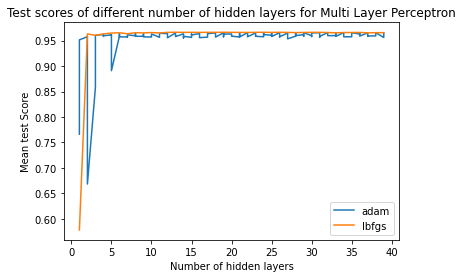

In [18]:
MLP_results1 = MLP_results[MLP_results['mean_test_score']>0.5]


MLP_adam = MLP_results1[(MLP_results1['param_solver'] == 'adam' )].sort_values(by = ['param_hidden_layer_sizes'])
MLP_lbfgs = MLP_results1[(MLP_results1['param_solver'] == 'lbfgs' )].sort_values(by = ['param_hidden_layer_sizes'])

plt.plot(MLP_adam['param_hidden_layer_sizes'], MLP_adam['mean_test_score'], label = 'adam')
plt.plot(MLP_lbfgs['param_hidden_layer_sizes'], MLP_lbfgs['mean_test_score'], label = 'lbfgs')

plt.xlabel('Number of hidden layers')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores of different number of hidden layers for Multi Layer Perceptron')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()